In [2]:
import os
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:1080/pac?auth=6kW2t5wCi1UNt1VioOiy&t=202404181401516765' # 7890改为自己的梯子端口
os.environ["HTTP_PROXY"]  = 'http://127.0.0.1:1080/pac?auth=6kW2t5wCi1UNt1VioOiy&t=202404181401516765'

In [5]:
import requests

API_URL = "https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5"
headers = {"Authorization": "Bearer xxx"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "Describe a quaint mountain village covered in fresh snow, with smoke rising from the chimneys and children ice-skating on a frozen pond under a starry sky.",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

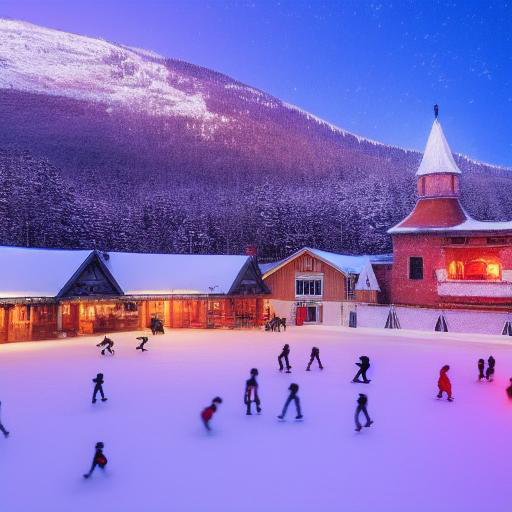

In [6]:
display(image)

In [3]:
import torch
from diffusers import ShapEPipeline
from diffusers.utils import export_to_gif


ckpt_id = "openai/shap-e"
pipe = ShapEPipeline.from_pretrained(repo).to("cuda")


guidance_scale = 15.0
prompt = "a shark"
images = pipe(
    prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=64,
    size=256,
).images

gif_path = export_to_gif(images, "shark_3d.gif")


Fetching model from: https://huggingface.co/stabilityai/stable-diffusion-xl-refiner-1.0


ValueError: Unsupported pipeline type: image-to-image